<a href="https://colab.research.google.com/github/bigyunicorn/fastai22/blob/main/lesson04/iterate_like_a_grandmaster!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's first import the data from the kaggle! 
The below shows the pseudocode of how to do so:
1. install kaggle python package as we need to use its API to get the dataset. 
2. Get the kaggle developer credentials (how to do so is available in both Jeremy's textbook and or link to the other source). This will download kaggle.json file to your local machine. 
3. Run the code to create a kaggle.json on the cloud.
4. Donwload the file. 

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
creds = '{"username":"<your user name>","key":"<your kaggle api key>"}'

In [ ]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
print(cred_path)
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600) #deciding the permission level. Ask chat gpt what this means, and it will tell you well!

/root/.kaggle/kaggle.json


In [ ]:
from pathlib import Path

import zipfile, kaggle
path = Path('us-patent-phrase-to-phrase-matching')
kaggle.api.competition_download_cli(str(path))
zipfile.ZipFile(f'{path}.zip').extractall(path)

us-patent-phrase-to-phrase-matching.zip: Skipping, found more recently modified local copy (use --force to force download)


Okay let's see what data is in the folder. 

In [ ]:
from fastai.imports import * 
path.ls()

(#3) [Path('us-patent-phrase-to-phrase-matching/train.csv'),Path('us-patent-phrase-to-phrase-matching/sample_submission.csv'),Path('us-patent-phrase-to-phrase-matching/test.csv')]

Let's see explore the data. This is how I am going to explore.
- (1) Check each train and test files. How does the data look like? How is it organized? 
- (2) You know the problem is asking the similarity between anchor and target. So we know these are important columns. Let's explore the distribution of data in these two columns. How the data is distributed is useful info as later on when we are going to split the train data into training and validation sets, we can decide how to do so.    
- (3) Also let's see other columns' disbrituion to see what the data is there. It might be useful to use it later. 
- (4) We know the score is the prediction value we need to provide. 

In [ ]:
df = pd.read_csv(path/'train.csv')
df

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00
...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50
36471,756ec035e694722b,wood article,wooden material,B44,0.75


Here I am just taking some notes on a few characteristics. I see there are about 36.5K unique values, and the data seems to be in the alphabetically order for `anchor` column. 

In [ ]:
eval_df = pd.read_csv(path/'test.csv')
eval_df

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04
5,474c874d0c07bd21,dry corn,dry corn starch,C12
6,442c114ed5c4e3c9,tunneling capacitor,capacitor housing,G11
7,b8ae62ea5e1d8bdb,angular contact bearing,contact therapy radiation,B23
8,faaddaf8fcba8a3f,produce liquid hydrocarbons,produce a treated stream,C10
9,ae0262c02566d2ce,diesel fuel tank,diesel fuel tanks,F02


For test data, I don't quite see any alphabetical order or `anchor` column. Maybe when I am training the data, I think I should change the alphabetical order part. 

Okay now let me explore the training data to get some idea on the features of data. Knolwedge on this part will be helpful to come up with how to divide the data etc. 

In [ ]:
df.target.value_counts() #check the distribution of the data as it can be helpful to decide how to split the data. 

composition                    24
data                           22
metal                          22
motor                          22
assembly                       21
                               ..
switching switch over valve     1
switching switch off valve      1
switching over valve            1
switching off valve             1
wooden substrate                1
Name: target, Length: 29340, dtype: int64

In [ ]:
df.anchor.value_counts()

component composite coating              152
sheet supply roller                      150
source voltage                           140
perfluoroalkyl group                     136
el display                               135
                                        ... 
plug nozzle                                2
shannon                                    2
dry coating composition1                   2
peripheral nervous system stimulation      1
conduct conducting material                1
Name: anchor, Length: 733, dtype: int64

In [ ]:
df.context.value_counts()

H01    2186
H04    2177
G01    1812
A61    1477
F16    1091
       ... 
B03      47
F17      33
B31      24
A62      23
F26      18
Name: context, Length: 106, dtype: int64

In [ ]:
df['section'] = df.context.str[0]
df['section']

0        A
1        A
2        A
3        A
4        A
        ..
36468    B
36469    B
36470    B
36471    B
36472    B
Name: section, Length: 36473, dtype: object

In [ ]:
df.section.value_counts() #It seems likely that these sections might be useful, since they've got quite a bit more data in each.

B    8019
H    6195
G    6013
C    5288
A    4094
F    4054
E    1531
D    1279
Name: section, dtype: int64

<Axes: >

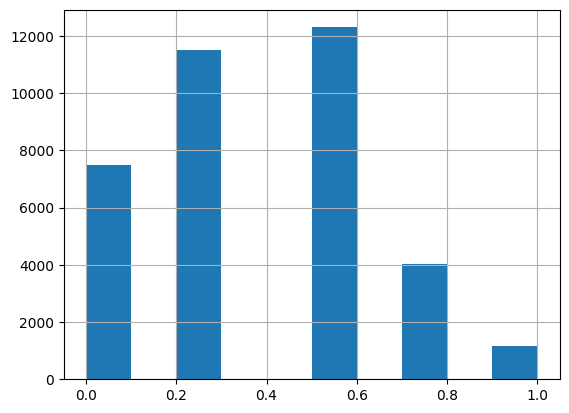

In [ ]:
df.score.hist()

In [ ]:
df[df.score==1]

,id,anchor,target,context,score,section
28,473137168ebf7484,abatement,abating,F24,1.0,F
158,621b048d70aa8867,absorbent properties,absorbent characteristics,D01,1.0,D
161,bc20a1c961cb073a,absorbent properties,absorption properties,D01,1.0,D
311,e955700dffd68624,acid absorption,absorption of acid,B08,1.0,B
315,3a09aba546aac675,acid absorption,acid absorption,B08,1.0,B
...,...,...,...,...,...,...
36398,913141526432f1d6,wiring trough,wiring troughs,F16,1.0,F
36435,ee0746f2a8ecef97,wood article,wood articles,B05,1.0,B
36440,ecaf479135cf0dfd,wood article,wooden article,B05,1.0,B
36464,8ceaa2b5c2d56250,wood article,wood article,B44,1.0,B


Aight good enough with exploring the data. Let's now train tehe model with the data. To do so, I am going to use the hugging face transfomrers. And transformers work well with datasets.

In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import TrainingArguments,Trainer
from transformers import AutoModelForSequenceClassification,AutoTokenizer

In [ ]:
model_nm = 'microsoft/deberta-v3-small'

In [ ]:
!pip install sentencepiece #https://github.com/huggingface/transformers/issues/9750 & restart the runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tokz =AutoTokenizer.from_pretrained(model_nm)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
type(tokz)

transformers.models.deberta_v2.tokenization_deberta_v2_fast.DebertaV2TokenizerFast

In [ ]:
tokz.tokenize("hi") # this is to show how to pass a string to tokenize it.

['▁hi']

In [ ]:
tokz("hi") # when you pass an input to the tokenizer, it returns a dic with some data. 

{'input_ids': [1, 8595, 2], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [ ]:
tokz.vocab['▁hi'] #you can use input_ids value to find the corresponding numerical value for a token.

8595

Now we have a tokenizer for deberta model, let's transform our data that is consumable by HuggingFace transformers. 

Step 1: convert the data into number. 



In [ ]:
sep = tokz.sep_token

In [ ]:
df['inputs'] = df.context + sep + df.anchor + sep + df.target

Changing PanDas DataFrames to HuggingFace Datasets as it is more performant. I think next time reading the csv direclty as a dataset makes more sense. 

In [ ]:
import datasets
from datasets import Dataset

In [ ]:
ds = Dataset.from_pandas(df).rename_column('score', 'label') #datasets of the training data. 
eval_ds = Dataset.from_pandas(eval_df) #dataset for evaluation. 

In [ ]:
def tok_func(x): return tokz(x["inputs"])

In [ ]:
ds[0]

{'id': '37d61fd2272659b1',
 'anchor': 'abatement',
 'target': 'abatement of pollution',
 'context': 'A47',
 'label': 0.5,
 'section': 'A',
 'inputs': 'A47[SEP]abatement[SEP]abatement of pollution'}

In [ ]:
tok_func(ds[0])

{'input_ids': [1, 336, 5753, 2, 47284, 2, 47284, 265, 6435, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokz.all_special_tokens

['[CLS]', '[SEP]', '[UNK]', '[PAD]', '[MASK]']

In [ ]:
inps = "anchor", "target", "context", "section", "inputs", "id"

In [ ]:
tok_ds = ds.map(tok_func, batched=True, remove_columns = inps)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [ ]:
tok_ds # this is the tokenized training data. 

Dataset({
    features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36473
})

In [ ]:
#tok_ds.select([0])

In [ ]:
#tok_ds[0]

Now we are done with representing our input as numbers. Then now let's explore how to split the training data into the data for training and the data for validation. 

In [ ]:
anchors = df.anchor.unique()
len(anchors)

733

In [ ]:
targets = df.target.unique()
len(targets)

29340

In [ ]:
type(anchors), type(targets)

(numpy.ndarray, numpy.ndarray)

In [ ]:
anchors[:5], targets[:5]

(array(['abatement', 'abnormal position', 'absorbent properties', 'acan',
        'accept information'], dtype=object),
 array(['abatement of pollution', 'act of abating', 'active catalyst',
        'eliminating process', 'forest region'], dtype=object))

In [ ]:
np.random.seed(42)

In [ ]:
np.random.shuffle(anchors)
np.random.shuffle(targets)

In [ ]:
anchors[:5], targets[:5] # verify that it is shuffled now.

(array(['time digital signal', 'antiatherosclerotic', 'filled interior',
        'dispersed powder', 'locking formation'], dtype=object),
 array(['project onto exterior', 'display map', 'actuator operatively',
        'closed terrarium layers', 'image detection'], dtype=object))

Let's use 25% of the training data as the validation data set. 

In [ ]:
val_prop = 0.25
val_sz_anchors = int(len(anchors)*val_prop) #this gives us the index that we can use for anchors. 
val_sz_targets = int(len(targets)*val_prop) # this gives us the index that we can sue for targets. 
val_sz_anchors, val_sz_targets

(183, 7335)

In [ ]:
val_anchors = anchors[:val_sz_anchors] # this is the list of anchor value that I am going to use for the validation set. 
val_targets = targets[:val_sz_targets] # this is the list of target value that I am going to use for the validation set.

In [ ]:
is_val_anchors = np.isin(df.anchor, val_anchors) #is the data in val_anchors in the df.anchor? If so we are not going to use it for training. 
is_val_targets = np.isin(df.target, val_targets)
#is_val_anchors is the list whose size is the same as the training data. But it contains the values that indicate whether each anchor  is in the evaluation dataset. 
#is_valtargets is the same as is_val_anchors but use target value to check. 

In [ ]:
is_val_anchors, is_val_targets

(array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]))

In [ ]:
len(df.anchor), len(df.target), len(is_val_anchors), len(is_val_targets)

(36473, 36473, 36473, 36473)

In [ ]:
idxs = np.arange(len(df)) # create an array of index that is the same as the training data. It is to figure out indices that contain the data that I am going to use for the validation est. 

In [ ]:
val_idxs_anchors = idxs[is_val_anchors]  
trn_idxs_anchors = idxs[~is_val_anchors]
val_idxs_targets = idxs[is_val_targets]
trn_idxs_targets = idxs[~is_val_targets]

In [ ]:
val_idxs_anchors, val_idxs_targets, len(val_idxs_anchors), len(val_idxs_targets)

(array([  131,   132,   133, ..., 36414, 36415, 36416]),
 array([    3,     6,     7, ..., 36451, 36456, 36457]),
 9116,
 9168)

In [ ]:
trn_idxs_anchors, trn_idxs_targets, len(trn_idxs_anchors), len(trn_idxs_targets)  # list of indices for training data. Slightly different based on which column I used. 

(array([    0,     1,     2, ..., 36470, 36471, 36472]),
 array([    0,     1,     2, ..., 36470, 36471, 36472]),
 27357,
 27305)

In [ ]:
len(val_idxs_anchors),len(trn_idxs_anchors)

(9116, 27357)

In [ ]:
len(val_idxs_targets), len(trn_idxs_targets)

(9168, 27305)

Okay now we have validation data set and training data set. To use these data sets with Huggnigface Transformers, we need to make it as DatasetDict. 

In [ ]:
from datasets import DatasetDict
dds_anchors = DatasetDict({
    "train": tok_ds.select(trn_idxs_anchors),
    "test": tok_ds.select(val_idxs_anchors)
})

dds_targets = DatasetDict({
    "train": tok_ds.select(trn_idxs_targets),
    "test": tok_ds.select(val_idxs_targets)
})


dds_using_validation = DatasetDict({
    "train": tok_ds.select(trn_idxs_anchors),
    "validation":tok_ds.select(val_idxs_anchors)
})

dds_using_noTokenizedInput = DatasetDict({
    "train":ds.select(trn_idxs_anchors),
    "test":ds.select(val_idxs_anchors)
})

Now we have the dataset ready, we somehow use this data to train our model. 

We know we are going to use the huggingface transformer. With the transformer, to train the model, we need to create a trainer object. 

Let's see the definition of the train on the hugging face doc.


I think the below shows what we need to create a trainer class the best. [link](https://huggingface.co/docs/transformers/training#trainer) 
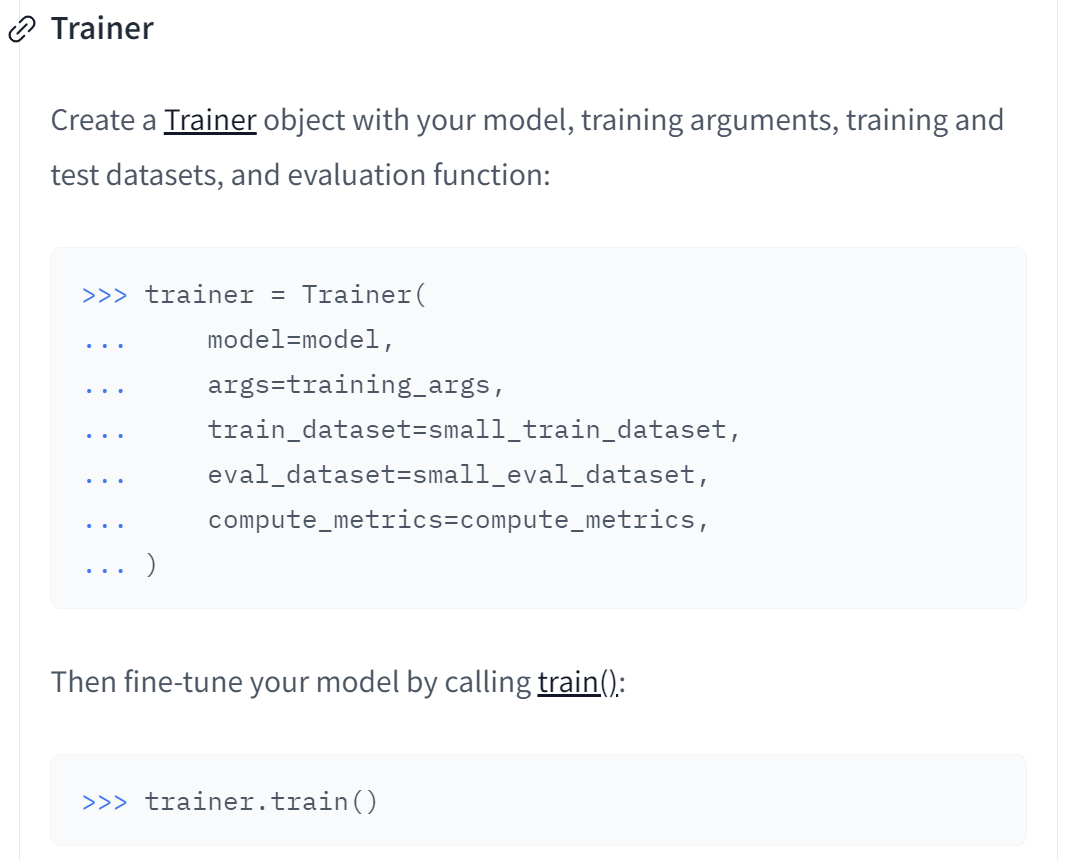

If you think about it, we already have values to give for these parameters. 
(1) We have a model.
(2) We have a train_dataset.
(3) We have a eval_dataset. 
What we don't have is something called tarining_args, and compute_metrics. Let's learn how to get these one by one. 

First, trainging_args type is TrainingArugments. This is the class which contains all the hyperparameters you can tune as well as flags for activating different training options.

For this one, i am just following what Jeremy set up with some understanding of what each field means. 

In [ ]:
lr,bs = 8e-5,128 #leraning rate, and batch size.
wd,epochs = 0.01,4 #weight decay and small epochs only for the experiment. 

In [ ]:
#!pip install transformers[torch]

In [ ]:
args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
        evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
        num_train_epochs=epochs, weight_decay=wd, report_to='none')
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

In [ ]:
# args = TrainingArguments('outputs', 
#                          learning_rate=lr, #learning rate
#                          warmup_ratio=0.1, #some technique. 
#                          lr_scheduler_type='cosine', # a technique wtih applying the learning rate. FastAi found this is pretty reliable. 
#                          fp16=True, #using floating 16 on GPU to improve performance
#                          evaluation_strategy="epoch", #when to do evaluation. 
#                          per_device_train_batch_size=bs, 
#                          per_device_eval_batch_size=bs*2, #no gradients are stored during the evaluation so we have more memory. 
#                          num_train_epochs=epochs, 
#                          weight_decay=wd, #technique that  helps with model generalization. 
#                          report_to='none') #if i have any integrations with ML platform? i think we can use this to reprot th results/logging. 

Okay now we have TrainingArguments, let's figure out how to define and get compute_metrics. 

Metrics is for us to use how well our model is doing. In my case, the model will calculate the similarity between targets and anchors and return the value in the format of score. And we are going to compare this result with the score that is givin in CSV file. [Question: how does the model extract anchor & target and calculate the similarity? That is still hidden. The language model is actually guessing the next word. I amde the whole column as a text including the score. OH it is basically learning the pattern and predict the score. It is not actually calculating??!!] 

If we go to Kaggle for this competition, the kaggle mentions that they are using Pearson correlation coefficient. (https://www.kaggle.com/competitions/us-patent-phrase-to-phrase-matching/overview/evaluation)

For me, I didn't spend much time to understand the mathematical term. But I know that this value is used to show the relationship between two variables. The smaller the value is, it means two variables are not similar/related. 

How to calculate is handled by numpy. Numpy has corrcoef method we can use (reference). if we read the doc.. I need to pass the two variables. In my competition it is going to be 'label' column that is associated with 'input_id' (this is the expected result), and the value that was probably predicted by BERT model. I think how these values are passed is going to be figued out by huggingface transformers. I just need to define the function. 

In [ ]:
def corr(eval_pred): return {'pearson': np.corrcoef(*eval_pred)[0][1]} 
# what is eval_pred..? how will it look like? Let's see how transformer will extract this...? 
# ideally it will be np.corrcoef(calculatedPrediction, label)[0][1]. but somehow eval_pred will work?

Let's put everything together. 



In [ ]:
# trainer = Trainer(
#     model= model,
#     args = args, 
#     train_dataset = dds_anchors['train'],
#     eval_dataset = dds_anchors['test'],
#     tokenizer=tokz,
#     compute_metrics = corr
# )

Let's train :) 

In [ ]:
#cross validation: how to get the man of four metrics
# when I am training the data, try it without passing the tokenizer as the datasets is already tokenized and see whether I can get the same result. 
# check datasets documentation and see whether I can pass data without processing it with the tokenizer. 

In [ ]:
#trainer.train()

Let's try it with dataset that is using target. 



In [ ]:
trainer = Trainer(
    model= model,
    args = args, 
    train_dataset = dds_targets['train'],
    eval_dataset = dds_targets['test'],
    tokenizer=tokz,
    compute_metrics = corr
) # this is better

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DebertaV2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.030034,0.785127
2,No log,0.024824,0.816296
3,0.034100,0.023931,0.827368
4,0.034100,0.023327,0.828686


TrainOutput(global_step=856, training_loss=0.02552469701410454, metrics={'train_runtime': 65.0893, 'train_samples_per_second': 1678.002, 'train_steps_per_second': 13.151, 'total_flos': 467284990499280.0, 'train_loss': 0.02552469701410454, 'epoch': 4.0})

In [ ]:
# trainer = Trainer(
#     model= model,
#     args = args, 
#     train_dataset = dds_using_validation['train'],
#     eval_dataset = dds_using_validation['validation'],
#     tokenizer=tokz,
#     compute_metrics = corr
# )
# trainer.train() #this isn't better. 

In [ ]:
# trainer = Trainer(
#     model= model,
#     args = args, 
#     train_dataset = dds_using_noTokenizedInput['train'],
#     eval_dataset = dds_using_noTokenizedInput['test'],
#     tokenizer=tokz,
#     compute_metrics = corr
# )
# trainer.train() #getting errors. ValueError: You should supply an encoding or a list of encodings to this method that includes input_ids, but you 
#provided ['label']. This tells me that input_ids is an important part of it, and that's why we do tokenization. And we also pas in tokenizer as it does more magic on the input (guess)

I see the metric value is pretty stable, so I think now I have a good basic to start with. Let's explore a few ways to improve the restuls. We are going to experiment, and usually we change the data or model. To expedite the process, let's create functions to get the datasets andt trainer easily.


In [ ]:
def get_dds(df):
    ds = Dataset.from_pandas(df).rename_column('score', 'label')
    tok_ds = ds.map(tok_func, batched=True, remove_columns=inps)
    return DatasetDict({"train":tok_ds.select(trn_idxs_targets), "test": tok_ds.select(val_idxs_targets)})

def get_model(): return AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)

def get_trainer(dds, model=None):
    if model is None: model = get_model()
    args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
        evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
        num_train_epochs=epochs, weight_decay=wd, report_to='none')
    return Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],tokenizer=tokz, compute_metrics=corr)

For expriments, I am just going to follow Jeremy's ways as I am just learning. ( i guess trying out with target instead of anchor was my idea). I am going to still use target and let's see how the result is going to be different. 

Idea 1: Using a different separator

In [ ]:
sep = " [s] "
df['inputs'] = df.context + sep + df.anchor + sep + df.target
dds = get_dds(df)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [ ]:
get_trainer(dds).train() #for me it is not quite better, but let's keep it.

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.029258,0.796114
2,No log,0.022912,0.822653
3,0.031700,0.023438,0.828892
4,0.031700,0.022860,0.830627


TrainOutput(global_step=856, training_loss=0.024062187315147615, metrics={'train_runtime': 63.896, 'train_samples_per_second': 1709.34, 'train_steps_per_second': 13.397, 'total_flos': 580318948530480.0, 'train_loss': 0.024062187315147615, 'epoch': 4.0})

Often changing to lowercase is helpful. Let's see if that helps too:

In [ ]:
df['inputs'] = df.inputs.str.lower()
dds = get_dds(df)
get_trainer(dds).train() #hmm not much bettter when I just ran the lower case without using a different sept. With different sept + lower case, I am getting pretty good reuslt but not as good as the target itself.

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.026815,0.800112
2,No log,0.022828,0.820041
3,0.031300,0.023093,0.828741
4,0.031300,0.022584,0.831513


TrainOutput(global_step=856, training_loss=0.02379544260345887, metrics={'train_runtime': 63.7424, 'train_samples_per_second': 1713.46, 'train_steps_per_second': 13.429, 'total_flos': 580318948530480.0, 'train_loss': 0.02379544260345887, 'epoch': 4.0})

What if we made the patent section a special token? Then potentially the model might learn to recognize that different sections need to be handled in different ways.

In [ ]:
df['sectok'] = '[' + df.section + ']'
sectoks = list(df.sectok.unique())
tokz

DebertaV2TokenizerFast(name_or_path='microsoft/deberta-v3-small', vocab_size=128000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [ ]:
tokz.add_special_tokens({'additional_special_tokens': sectoks})
tokz

DebertaV2TokenizerFast(name_or_path='microsoft/deberta-v3-small', vocab_size=128000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]', 'additional_special_tokens': ['[A]', '[C]', '[F]', '[H]', '[B]', '[D]', '[E]', '[G]']}, clean_up_tokenization_spaces=True)

In [ ]:
df['inputs'] = df.sectok + sep + df.context + sep + df.anchor.str.lower() + sep + df.target
dds = get_dds(df)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

Since we've added more tokens, we need to resize the embedding matrix in the model: (not quite sure about the concept of embedding matrix)



In [ ]:
model = get_model()
model.resize_token_embeddings(len(tokz))

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

Embedding(128009, 768)

In [ ]:
trainer = get_trainer(dds, model=model)
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.026610,0.797117
2,No log,0.022896,0.819984
3,0.031900,0.023397,0.832268
4,0.031900,0.022692,0.831982


TrainOutput(global_step=856, training_loss=0.024042385760868822, metrics={'train_runtime': 67.5633, 'train_samples_per_second': 1616.558, 'train_steps_per_second': 12.67, 'total_flos': 693352906561680.0, 'train_loss': 0.024042385760868822, 'epoch': 4.0})

Cross-validation - not quite sure....i understood...? hope it comes up.


In [ ]:
model_nm = "anferico/bert-for-patents"
bs = 16
model = get_model()
trainer = get_trainer(dds, model=model)
trainer.train()

Some weights of the model checkpoint at anferico/bert-for-patents were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not 

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 4>:4                                                                              │
│ in get_trainer:13                                                                                │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:335 in __init__                  │
│                                                                                                  │
│    332 │   │   │   args = TrainingArguments(output_dir=output_dir)                               │
│    333 │   │   self.args = args                                                                  │
│    334 │   │   # Seed must be set before instantiating the model when using model                │
│ ❱  335 │   │   enable_full_determinism(self.args.seed) if self.args.full_determinism else set_s  │
│    336 │   │   self.hp_name = None                                                               │
│    337 │   │   self.deepspeed = None                                                             │
│    338 │   │   self.is_in_train = False                                                          │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer_utils.py:93 in set_seed             │
│                                                                                                  │
│    90 │   random.seed(seed)                                                                      │
│    91 │   np.random.seed(seed)                                                                   │
│    92 │   if is_torch_available():                                                               │
│ ❱  93 │   │   torch.manual_seed(seed)                                                            │
│    94 │   │   torch.cuda.manual_seed_all(seed)                                                   │
│    95 │   │   # ^^ safe to call this function even if cuda is not available                      │
│    96 │   if is_tf_available():                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/random.py:40 in manual_seed                        │
│                                                                                                  │
│    37 │   import torch.cuda                                                                      │
│    38 │                                                                                          │
│    39 │   if not torch.cuda._is_in_bad_fork():                                                   │
│ ❱  40 │   │   torch.cuda.manual_seed_all(seed)                                                   │
│    41 │                                                                                          │
│    42 │   import torch.mps                                                                       │
│    43 │   if not torch.mps._is_in_bad_fork():                                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/cuda/random.py:113 in manual_seed_all              │
│                                                                                                  │
│   110 │   │   │   default_generator = torch.cuda.default_generators[i]                           │
│   111 │   │   │   default_generator.manual_seed(seed)                                            │
│   112 │                                                                                          │
│ ❱ 113 │   _lazy_call(cb, seed_all=True)                    

In [ ]:
n_folds = 4
from sklearn.model_selection import StratifiedGroupKFold
cv = StratifiedGroupKFold(n_splits=n_folds)
df = df.sample(frac=1, random_state=42)
scores = (df.score*100).astype(int)
folds = list(cv.split(idxs, scores, df.anchor))
folds

[(array([    0,     1,     2, ..., 36469, 36471, 36472]),
  array([    8,    13,    14, ..., 36453, 36464, 36470])),
 (array([    0,     1,     5, ..., 36470, 36471, 36472]),
  array([    2,     3,     4, ..., 36459, 36461, 36462])),
 (array([    1,     2,     3, ..., 36467, 36470, 36472]),
  array([    0,     7,    11, ..., 36468, 36469, 36471])),
 (array([    0,     2,     3, ..., 36469, 36470, 36471]),
  array([    1,     5,     9, ..., 36465, 36467, 36472]))]

In [ ]:
def get_fold(folds, fold_num):
    trn,val = folds[fold_num]
    return DatasetDict({"train":tok_ds.select(trn), "test": tok_ds.select(val)})

In [ ]:
metrics = [o['eval_pearson'] for o in trainer.state.log_history if 'eval_pearson' in o]
metrics[-1]

0.8319822865975671

Try out a different model.